In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pysr import PySRRegressor

In [32]:
def error(data,model):
    if len(data) != len(model):
        print('ERROR: array must have the same length!')
        return
    
    l = len(data)
    error = []
    
    for i in range(l):
        error.append(100*abs((data[i] - model[i]) / data[i]))
    
    return np.array(error)

In [33]:
def accuracy(data, model):
    if len(data) != len(model):
        print('ERROR: array must have the same length!')
        return
    
    l = len(data)
    total_error = 0
    
    for i in range(l):
        error = abs((data[i] - model[i]) / data[i])
        total_error += error
    
    avg_error = total_error / l
    accuracy_percentage = 100 * (1 - avg_error)
    
    return accuracy_percentage

In [34]:
model = PySRRegressor()

In [35]:
def bran(x,T,alpha):
    a = model.from_file(alpha)
    T_1 = a.predict(x)
    print('Model equation is: ', a.latex())
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))
    axs[0].scatter(x,T, s=2, label='CLASS data')
    axs[0].plot(x[0:114], T_1[0:114], lw=1.5, label='From PySR', color='r')
    axs[0].set_xlabel(r'$x$')
    axs[0].set_ylabel(r'$T(x)$')
    axs[0].set_title('Computed vs SR')
    axs[0].loglog()
    axs[0].grid(True)
    axs[0].legend()


    axs[1].scatter(x,error(T,T_1),s=3)
    axs[1].set_xlabel(r'$x$')
    axs[1].set_ylabel(r'$\frac{|T_{CLASS}(x)-T_{SR}(x)|}{T_{CLASS}(x)}\cdot 100$')
    axs[1].set_title('Error')
    axs[1].grid(True)
    axs[1].loglog()

    print('The accuracy of the model is: ',np.round(accuracy(T,T_1),2),'%')
    print('Max percentage error is: ',np.round(np.amax(error(T,T_1)),2),'%')


lol

In [36]:
df = pd.read_csv('CL_20_50.csv')
df

,ell,tau,EE,TE,TT
0,2,0.0261,2.696135e-15,5.184006e-13,2.933414e-10
1,3,0.0261,9.000036e-16,1.750712e-13,1.260812e-10
2,4,0.0261,2.846580e-16,7.356274e-14,7.058126e-11
3,5,0.0261,1.033405e-16,3.338028e-14,4.537917e-11
4,6,0.0261,5.651277e-17,1.593228e-14,3.170362e-11
...,...,...,...,...,...
975,46,0.1261,4.961716e-17,-4.479767e-16,6.197764e-13
976,47,0.1261,5.026926e-17,-5.007403e-16,5.980501e-13
977,48,0.1261,5.093644e-17,-5.513168e-16,5.776208e-13
978,49,0.1261,5.160610e-17,-5.995538e-16,5.583742e-13


In [37]:
model = PySRRegressor()

In [38]:
beta = model.from_file('hall_of_fame_2023-09-20_002357.396.pkl')
print(beta.latex())

Checking if hall_of_fame_2023-09-20_002357.396.pkl exists...
Loading model from hall_of_fame_2023-09-20_002357.396.pkl
\left(\left(0.0874 \ell\right)^{- 13.2 \ell + 13.2 e^{5.17 \tau}} + 1.45\right)^{\tau}


$$ \left(\left(0.0874 \ell\right)^{- 13.2 \ell + 13.2 e^{5.17 \tau}} + 1.45\right)^{\tau}$$

[73.89924412]
$\tau$ _ 0  accuracy: None
[77.16442207]
$\tau$ _ 1  accuracy: None
[79.57997864]
$\tau$ _ 2  accuracy: None
[81.55874315]
$\tau$ _ 3  accuracy: None
[83.19762275]
$\tau$ _ 4  accuracy: None
[84.41177468]
$\tau$ _ 5  accuracy: None
[84.96378013]
$\tau$ _ 6  accuracy: None
[85.08739404]
$\tau$ _ 7  accuracy: None
[85.01438665]
$\tau$ _ 8  accuracy: None
[84.6201119]
$\tau$ _ 9  accuracy: None
[84.21480878]
$\tau$ _ 10  accuracy: None
[83.73289821]
$\tau$ _ 11  accuracy: None
[83.19013898]
$\tau$ _ 12  accuracy: None
[82.325201]
$\tau$ _ 13  accuracy: None
[81.18811249]
$\tau$ _ 14  accuracy: None
[80.05478682]
$\tau$ _ 15  accuracy: None
[78.53993821]
$\tau$ _ 16  accuracy: None
[77.01627158]
$\tau$ _ 17  accuracy: None
[75.44918475]
$\tau$ _ 18  accuracy: None
[73.82240474]
$\tau$ _ 19  accuracy: None


<Figure size 1800x900 with 0 Axes>

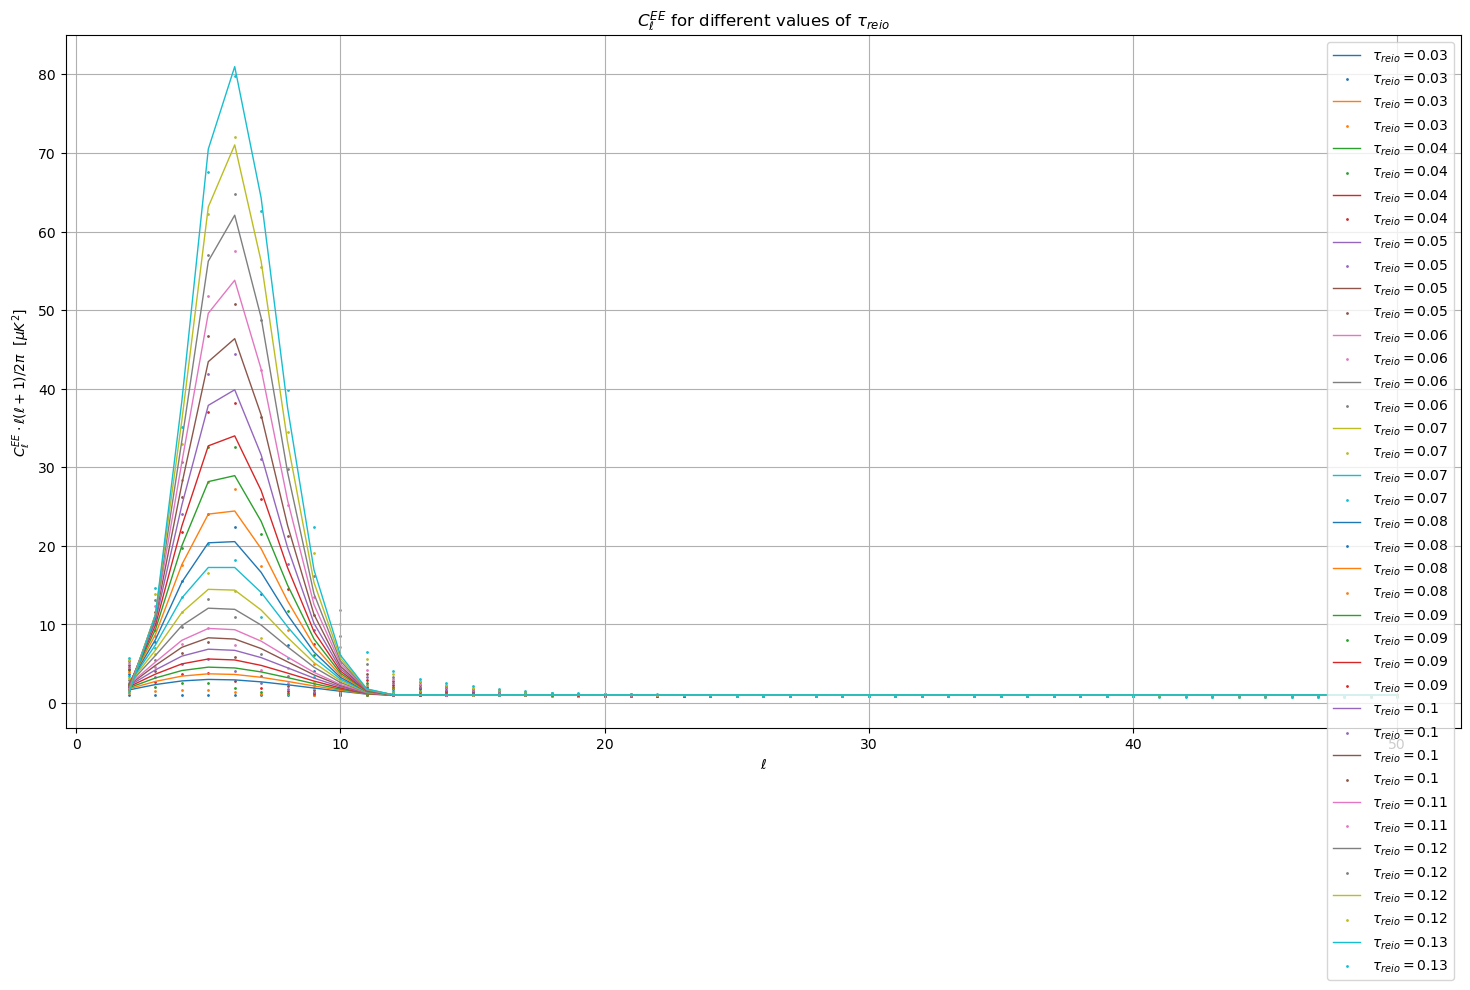

In [51]:
t_reio = np.round(np.linspace(0.0261, 0.1261, 20, endpoint=True),4)
tau_real = 0.0561
index = np.abs(t_reio - tau_real).argmin()
t_reio[index] = tau_real
x = pd.DataFrame({'ell': df['ell'], 'tau': df['tau']})
ee = pd.DataFrame({'EE': df['EE']})
a = len(t_reio)
ell = df['ell']
b = len(ell)
alpha = int(b/a)
plt.figure(figsize=(18, 9))
ee_alpha = ee[0:alpha]

plt.figure(figsize=(18, 9))
for i in range(a):
    l = ell[i * alpha:(i + 1) * alpha]
    
    y = np.array(ee[i * alpha:(i + 1) * alpha]) / np.array(ee_alpha)
    
    z = beta.predict(x)[i * alpha:(i + 1) * alpha]
    string = r'$\tau_{reio}=$' + str(round(t_reio[i], 2))
    plt.plot(l, z, lw=1, label=string)
    plt.scatter(l, y, s=1, label=string)
    print(r'$\tau$ _',i,' accuracy:',print(accuracy(y,z)))
    plt.legend()  

plt.xlabel('$\ell$')
plt.ylabel('$C^{EE}_{\ell}\cdot \ell(\ell+1)/2\pi \ \ [\mu K^2]$')
plt.title(r'$C_{\ell}^{EE}$ for different values of $\tau_{reio}$')
plt.grid(True)
plt.show() 